MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

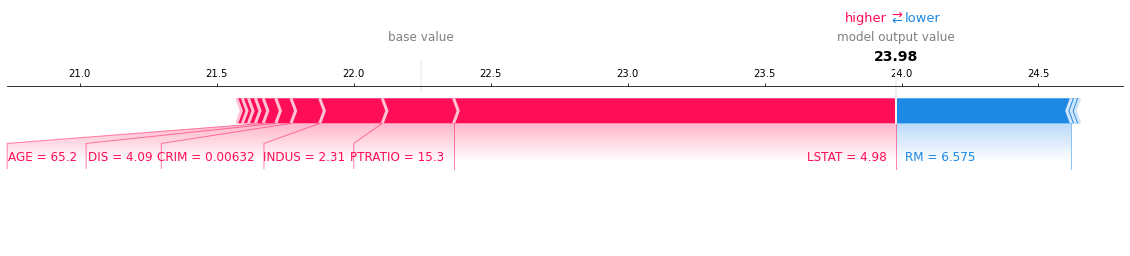

[23.08 18.28 17.71 23.39 24.92 21.83 21.56 29.9  27.64 23.   23.14 21.91
 22.73 21.71 27.11 28.65 19.24 23.19 20.76 22.14 24.56 20.32 22.77 18.14
 23.43 20.46 22.63 19.23 22.97 30.55 23.59 23.85 18.74 27.92 28.93 17.79
 21.51 29.87 18.98 23.02 20.74 23.48 22.17 27.92 19.78 20.72 21.44 24.5
 30.64 22.09 23.7  20.14 19.51 23.09 17.92 19.61 22.7  21.18 19.06 18.34
 18.61 27.64 20.55 20.81 20.27 23.06 23.19 18.87 22.4  28.84 19.08 18.19
 21.36 21.85 20.76 20.64 21.67 17.83 22.72 28.27 21.61 22.33 24.88 19.48
 17.74 22.82 23.1  19.56 21.48 21.61 21.19 19.74 24.84 20.67 25.93 21.62
 21.99 19.08 25.62 18.95 26.21 21.56]
[20.7 12.7  8.5 25.1 28.2 22.5 18.2 43.5 36.1 23.8 22.6 22.6 22.  22.9
 35.4 50.  17.8 24.1 21.7 20.6 26.7 19.7 21.2 13.4 23.1 18.8 20.9 11.7
 21.6 37.6 26.5 26.6 23.2 31.6 50.   7.2 18.9 50.  15.4 21.6 22.5 25.3
 21.7 34.9 20.8 17.5 21.8 27.5 50.  21.7 23.3 21.5 10.2 23.1 12.1 18.1
 11.9 21.7 27.5 13.1 16.7 32.7 23.2 19.8 19.6 22.2 22.3 13.5 18.9 50.
 14.   7.5 20.6 18.5 19.6

In [3]:
import numpy as np
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
import shap

np.set_printoptions(precision=2, suppress=True)

X,y = shap.datasets.boston()
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.8, random_state=12)

model = CatBoostRegressor(iterations=700,
                             learning_rate=0.001,
                             eval_metric='RMSE',
                             random_seed = 12,
                             silent=True)

model.fit(X_train, y_train, eval_set=(X_validation, y_validation), use_best_model = True, plot=True)


shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value, shap_values, X)
